# Classification Evaluation Matrix

## Confusion Matrix
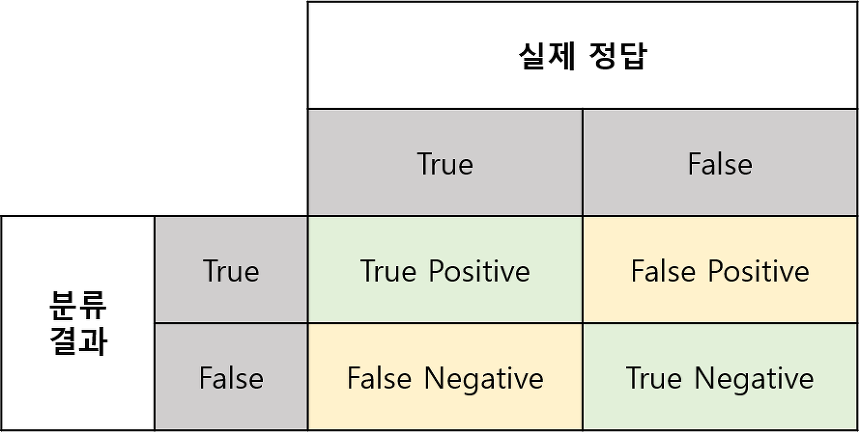
## True || False : 정답인지 아닌지
## Positive || Negative : 예측한 값
### - True Positive(TP) : 실제 True인 정답을 True라고 예측 (정답)
### - False Positive(FP) : 실제 False인 정답을 True라고 예측 (오답)
### - False Negative(FN) : 실제 True인 정답을 False라고 예측 (오답)
### - True Negative(TN) : 실제 False인 정답을 False라고 예측 (정답)
<a href=https://sumniya.tistory.com/m/26>Image Reference</a>

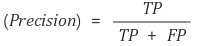

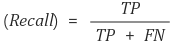

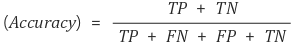

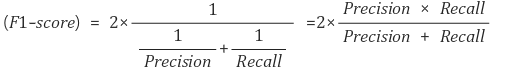

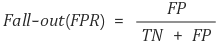

## ROC: Showing the performance of a classification model at all classification thresholds
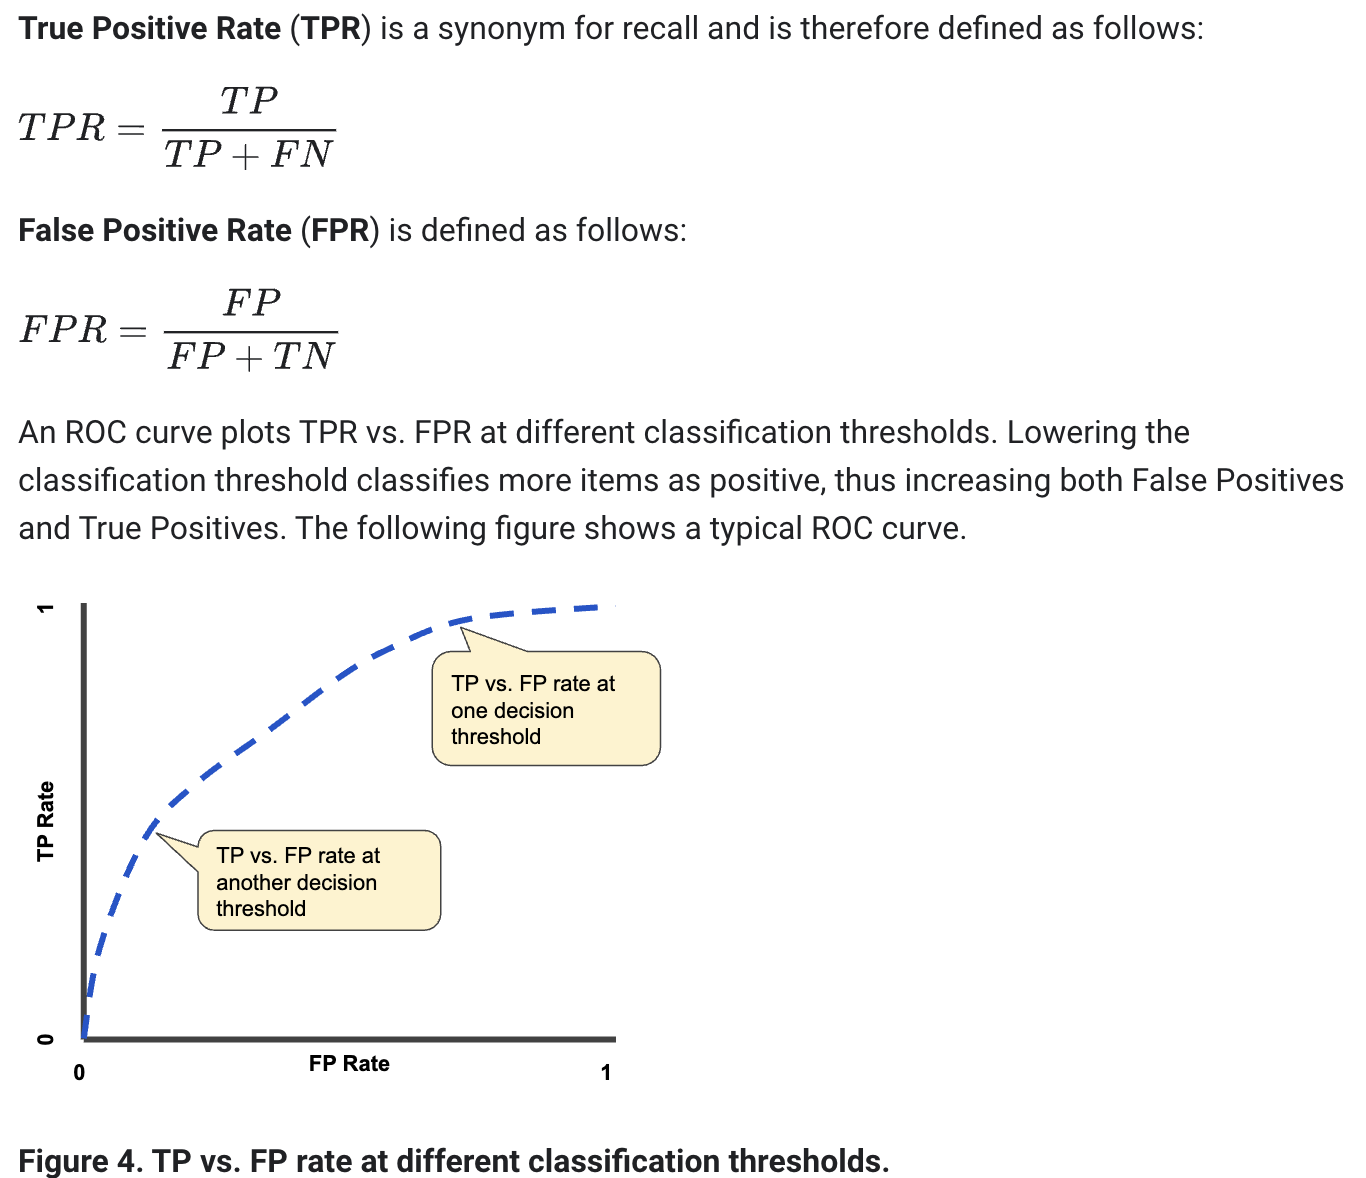

### AUC: Area under the ROC Curve
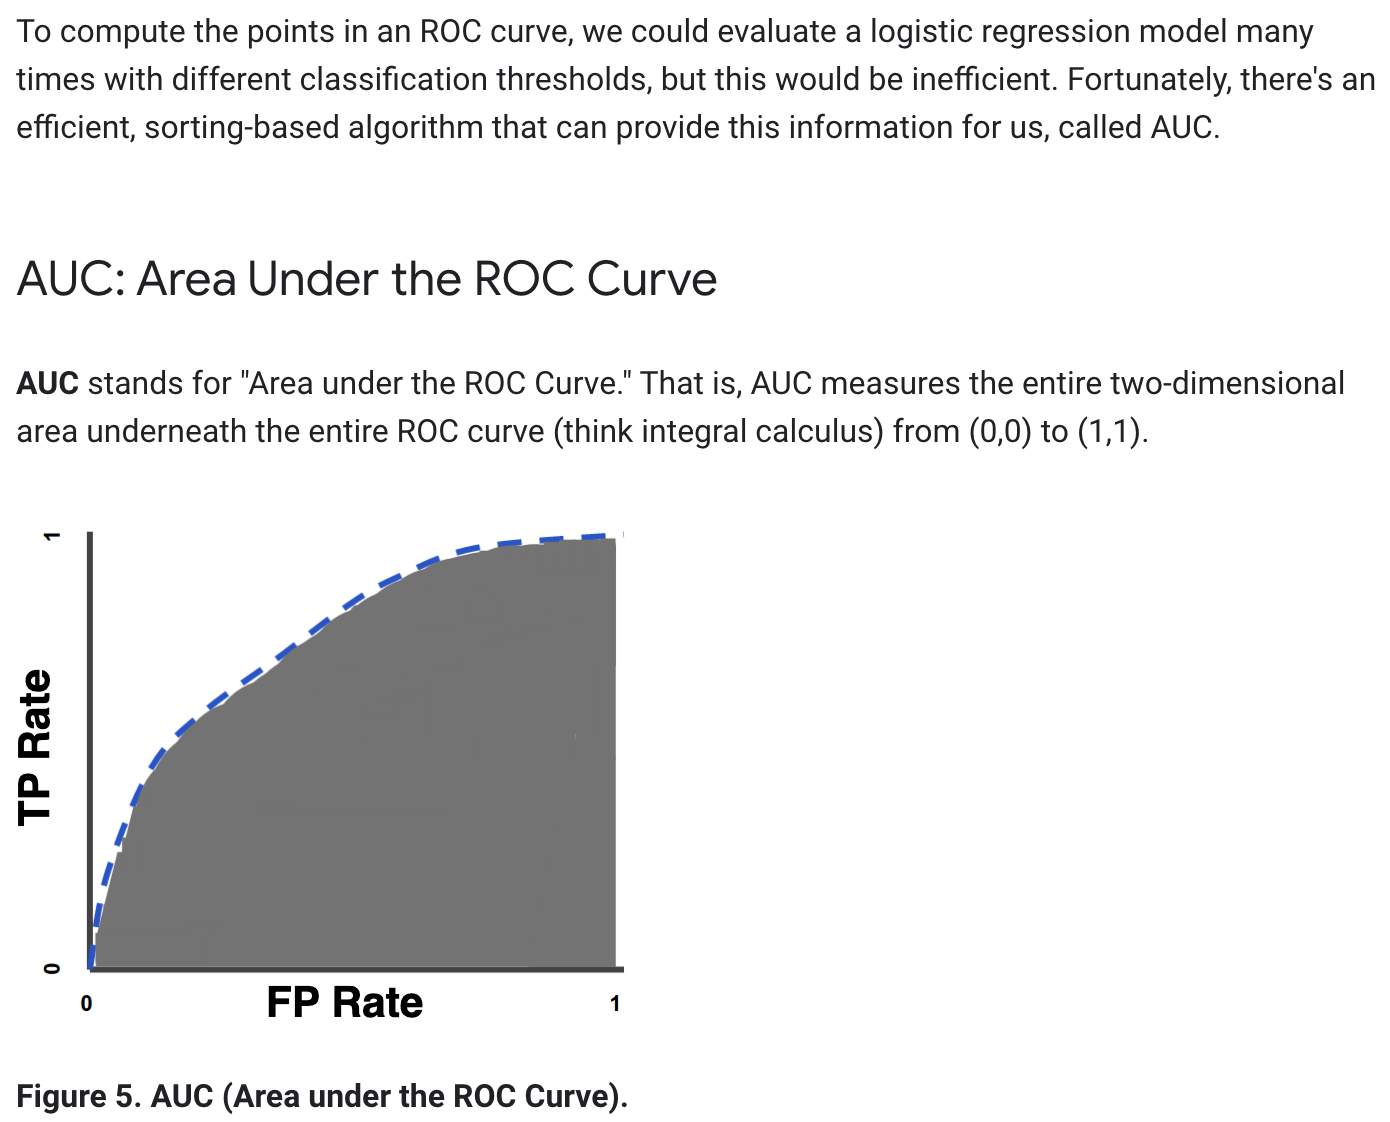
<a href="https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc?hl=en">Reference</a>

## Precision-Recall Trade off
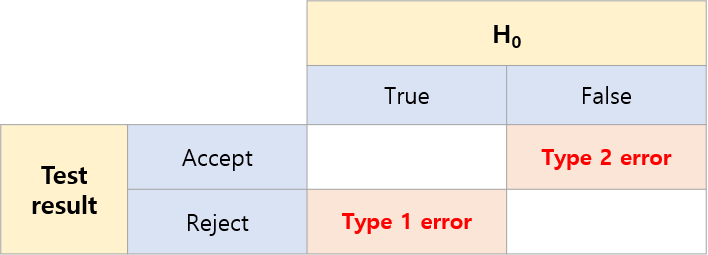
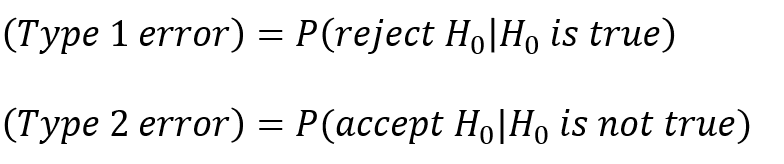
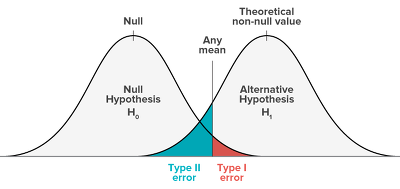

# Classification Evaluation Metrics Python from Scratch

## Load Data

In [2]:
import pandas as pd

In [3]:
data_path = "./ClassificationEvaluationMetrics_data.csv"

df = pd.read_csv(data_path)
df.head()

,y_act,y_pred_random_forest,y_pred_logistic
0,1,0.639816,0.531904
1,0,0.490993,0.414496
2,1,0.623815,0.569883
3,1,0.506616,0.443674
4,0,0.418302,0.369532


In [6]:
# Change column name

df.rename(columns = {"y_act": "y_actual"}, inplace=True)
display(df)

,y_actual,y_pred_random_forest,y_pred_logistic,y_pred_rf,y_pred_lr
0,1,0.639816,0.531904,1,1
1,0,0.490993,0.414496,0,0
2,1,0.623815,0.569883,1,1
3,1,0.506616,0.443674,1,0
4,0,0.418302,0.369532,0,0
...,...,...,...,...,...
15753,1,0.538108,0.534994,1,1
15754,0,0.672929,0.689612,1,1
15755,1,0.595899,0.560755,1,1
15756,1,0.511058,0.744783,1,1


## Prediction

In [7]:
threshold = 0.5

# Save prediction result of Random Forest
df["y_pred_rf"] = (df.y_pred_random_forest >= threshold).astype("int")
# Save prediction result of Logistic Regression
df["y_pred_lr"] = (df.y_pred_logistic >= threshold).astype("int")

df.head()

,y_actual,y_pred_random_forest,y_pred_logistic,y_pred_rf,y_pred_lr
0,1,0.639816,0.531904,1,1
1,0,0.490993,0.414496,0,0
2,1,0.623815,0.569883,1,1
3,1,0.506616,0.443674,1,0
4,0,0.418302,0.369532,0,0


In [8]:
df.shape

(15758, 5)

## Compute True Positive, True Negative, False Negative, False Positive
## <a href="https://github.com/bhattbhavesh91/classification-metrics-python/blob/master/ml_a.ipynb">Reference</a>

In [9]:
# Compute True Positive, True Negative, False Negative, False Positive

def compute_tp_tn_fn_fp(y_actual, y_pred):
    """
    True Positive: actual: 1, prediction: 1
    True Negative: actual: 0, prediction: 0
    False Negative: actual: 1, prediction: 0
    False Positive: actual: 0, prediction: 1
    """
    tp = sum((y_actual == 1) & (y_pred == 1))
    tn = sum((y_actual == 0) & (y_pred == 0))
    fn = sum((y_actual == 1) & (y_pred == 0))
    fp = sum((y_actual == 0) & (y_pred == 1))

    return tp, tn, fn, fp

In [12]:
# Random Forest Prediction Result

tp_rf, tn_rf, fn_rf, fp_rf = compute_tp_tn_fn_fp(df["y_actual"], df["y_pred_rf"])

print("Random Forest")
print("TP", "TN", "FN", "FP", ":", tp_rf, tn_rf, fn_rf, fp_rf)

Random Forest
TP TN FN FP : 5047 5519 2832 2360


In [11]:
# Logistic Regression Prediction Result

tp_lr, tn_lr, fn_lr, fp_lr = compute_tp_tn_fn_fp(df['y_actual'], df["y_pred_lr"])

print("Logistic Regression")
print("TP", "TN", "FN", "FP", ":", tp_lr, tn_lr, fn_lr, fp_lr)

Logistic Regression
TP TN FN FP : 4279 5425 3600 2454


## Accuracy
: 전체 중에서 예측이 진짜 값을 잘 맞춘 것(TP + TN)

In [14]:
# Compute Accuracy
def compute_accuracy(tp, tn, fn, fp):
    """
    Accuracy = (TP + TN) / (TP + FN + FP + TN)
    """
    return ((tp + tn) / float(tp + tn + fn + fp))

In [18]:
print("Accuracy: Custom Function")
print("Random Forest", compute_accuracy(tp_rf, tn_rf, fn_rf, fp_rf))
print("Logistic Regression", compute_accuracy(tp_lr, tn_lr, fn_lr, fp_lr))

Accuracy: Custom Function
Random Forest 0.6705165630156111
Logistic Regression 0.6158141896179719


In [19]:
# Compare with sklearn.metrics.accuracy_score

from sklearn.metrics import accuracy_score

print("Accuracy: sklearn.metrics.accuracy_score")
print("Random Forest", accuracy_score(df.y_actual, df.y_pred_rf))
print("Logistic Regression", accuracy_score(df.y_actual, df.y_pred_lr))

Accuracy: sklearn.metrics.accuracy_score
Random Forest 0.6705165630156111
Logistic Regression 0.6158141896179719


## Precision
: True로 예측한 것중 Actual value가 True

In [20]:
# Compute Precision
def compute_precision(tp, fp):
    """
    Precision = TP / (TP + FP)
    """
    return tp / (tp + fp)

In [22]:
print("Precision: Custom Function")
print("Random Forest", compute_precision(tp_rf, fp_rf))
print("Logistic Regression", compute_precision(tp_lr, fp_lr))

Precision: Custom Function
Random Forest 0.681382476036182
Logistic Regression 0.6355265112134264


In [23]:
# Compare with sklearn.metrics.precision_score

from sklearn.metrics import precision_score

print("Precision: sklearn.metrics.precision_score")
print("Random Forest", precision_score(df.y_actual, df.y_pred_rf))
print("Logistic Regression", precision_score(df.y_actual, df.y_pred_lr))

Precision: sklearn.metrics.precision_score
Random Forest 0.681382476036182
Logistic Regression 0.6355265112134264


## Recall
: Actual value가 True인 것 중에 True로 예측한 것

In [24]:
# Compute Recall
def compute_recall(tp, fn):
    """
    Recall = TP / (TP + FN)
    """
    return tp / (tp + fn)

In [25]:
print("Recall: Custom Function")
print("Random Forest", compute_recall(tp_rf, fn_rf))
print("Logistic Regression", compute_recall(tp_lr, fn_lr))

Recall: Custom Function
Random Forest 0.6405635232897576
Logistic Regression 0.5430892245208783


In [31]:
# Compare with sklearn.metrics.recall_score

from sklearn.metrics import recall_score

print("Recall: sklearn.metrics.recall_score")
print("Random Forest", recall_score(df.y_actual, df.y_pred_rf))
print("Logistic Regression", recall_score(df.y_actual, df.y_pred_lr))

Recall: sklearn.metrics.recall_score
Random Forest 0.6405635232897576
Logistic Regression 0.5430892245208783


## F1 Score
: Precision과 Recall의 조화평균
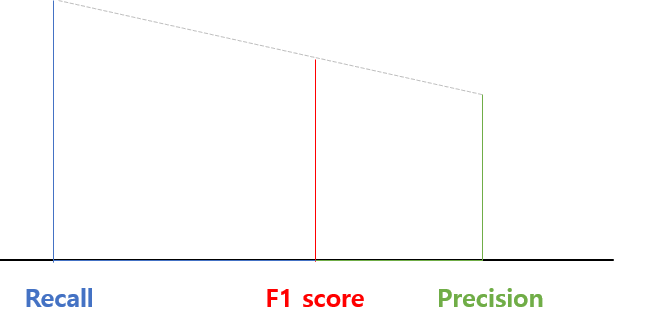

In [27]:
# Compute F1 Score

def compute_f1_score(y_actual, y_pred):
    """
    f1_score = (2 * precision * recall) / (precision + recall)
    """
    tp, tn, fp, fn = compute_tp_tn_fn_fp(y_actual, y_pred)
    precision = compute_precision(tp, fp)
    recall = compute_recall(tp, fn)
    f1_score = (2 * precision * recall) / (precision + recall)
    return f1_score

In [29]:
print("F1 Score: Custom Function")
print("Random Forest", compute_f1_score(df.y_actual, df.y_pred_rf))
print("Logistic Regression", compute_f1_score(df.y_actual, df.y_pred_lr))

F1 Score: Custom Function
Random Forest 0.660342797330891
Logistic Regression 0.5856830002737475


In [33]:
# Compare with sklearn.metrics.f1_score

from sklearn.metrics import f1_score

print("F1 Score: sklearn.metrics.f1_score")
print("Random Forest", f1_score(df.y_actual, df.y_pred_rf))
print("Logistic Regression", f1_score(df.y_actual, df.y_pred_lr))

F1 Score: sklearn.metrics.f1_score
Random Forest 0.660342797330891
Logistic Regression 0.5856830002737475


In [36]:
df[['y_actual', "y_pred_lr", 'y_pred_rf']]

,y_actual,y_pred_lr,y_pred_rf
0,1,1,1
1,0,0,0
2,1,1,1
3,1,0,1
4,0,0,0
...,...,...,...
15753,1,1,1
15754,0,1,1
15755,1,1,1
15756,1,1,1
